# Machine Learning with the Wisconsin Breast Cancer Dataset

The dataset consists of features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The samples are labelled as benign (0) or malignant (1).

This project compares three classification algorithms: Support Vector Classifier, Random Forest Classifier and K-Nearest Neighbours.

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  Preparing the data

Loading the data set:

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

Setting up a dataframe of features:

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
df_feat = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Normalising the feature data:

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(df_feat)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features = scaler.transform(df_feat)

In [10]:
df_feat_scaled = pd.DataFrame(scaled_features, columns = cancer['feature_names'])
df_feat_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Target data:

In [13]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_scaled, cancer['target'], test_size=0.30)

# Support Vector Classifier

Training the Support Vector Classifier:

In [14]:
from sklearn.svm import SVC

In [30]:
svc_model = SVC()

In [31]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Evaluating the model:

In [32]:
svc_predictions = svc_model.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test, svc_predictions))
print('\n')
print(classification_report(y_test, svc_predictions))

[[ 63   3]
 [  0 105]]


             precision    recall  f1-score   support

          0       1.00      0.95      0.98        66
          1       0.97      1.00      0.99       105

avg / total       0.98      0.98      0.98       171



The model has performed well with the default parameters. Let's see if optimisation via Gridsearch leads to any to improvement in performance.

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [22]:
svc_grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [23]:
svc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8947368421052632, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8721804511278195, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8484848484848485, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ..............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9774436090225563, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9398496240601504, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9696969696969697, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9774436090225563, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9774436090225563, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9848484848484849, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .............

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [35]:
optimised_svc_predictions = svc_grid.predict(X_test)

In [36]:
print(confusion_matrix(y_test, optimised_svc_predictions))
print('\n')
print(classification_report(y_test, optimised_svc_predictions))

[[ 64   2]
 [  0 105]]


             precision    recall  f1-score   support

          0       1.00      0.97      0.98        66
          1       0.98      1.00      0.99       105

avg / total       0.99      0.99      0.99       171



Optimising the parameters for the SVC has improved the performance of the model, reducing the (already low) false postive count by one.

# Random Forest Classifier

Training the Random Forest Classifier:

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=300)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Evaluating the RFC model:

In [39]:
rfc_predictions = rfc_model.predict(X_test)

In [40]:
print(confusion_matrix(y_test, rfc_predictions))
print('\n')
print(classification_report(y_test, rfc_predictions))

[[ 61   5]
 [  1 104]]


             precision    recall  f1-score   support

          0       0.98      0.92      0.95        66
          1       0.95      0.99      0.97       105

avg / total       0.97      0.96      0.96       171



The Random Forest Classifier performed well, but slightly worse than SVC model. Can we improve the performance of the model by optimising the parameters?

In [97]:
param_grid = {'n_estimators': [100, 300, 500, 700],'max_features': ['auto', 'sqrt', 'log2']}

rfc_grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)

rfc_grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_features=auto, n_estimators=100 .............................
[CV]  max_features=auto, n_estimators=100, score=0.9552238805970149, total=   0.0s
[CV] max_features=auto, n_estimators=100 .............................
[CV]  max_features=auto, n_estimators=100, score=0.9545454545454546, total=   0.0s
[CV] max_features=auto, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_features=auto, n_estimators=100, score=0.9696969696969697, total=   0.0s
[CV] max_features=auto, n_estimators=300 .............................
[CV]  max_features=auto, n_estimators=300, score=0.9552238805970149, total=   0.2s
[CV] max_features=auto, n_estimators=300 .............................
[CV]  max_features=auto, n_estimators=300, score=0.946969696969697, total=   0.2s
[CV] max_features=auto, n_estimators=300 .............................
[CV]  max_features=auto, n_estimators=300, score=0.9545454545454546, total=   0.2s
[CV] max_features=auto, n_estimators=500 .............................
[CV]  max_features=auto, n_estimators=500, score=0.9552238805970149, total=   0.4s
[CV] max_features=auto, n_estimators=500 .............................
[CV]  max_features=auto, n_estimators=500, score=0.946969696969697, total=   0.4s
[CV] max_features=auto, n_estimators=500 .............................
[CV]  max_features=auto, n_estimators=500, score=0.9545454545454546, total=   

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   13.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 300, 500, 700], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [98]:
optimised_rfc_predictions = rfc_grid.predict(X_test)

In [99]:
print(confusion_matrix(y_test, optimised_rfc_predictions))
print('\n')
print(classification_report(y_test, optimised_rfc_predictions))

[[ 61   3]
 [  2 105]]


             precision    recall  f1-score   support

          0       0.97      0.95      0.96        64
          1       0.97      0.98      0.98       107

avg / total       0.97      0.97      0.97       171



While the optimised RFC model had better overall precision and recall than the initial RFC model, the false negative count increased by one. Given the nature of the dataset and its potential use (diagnosing cancer), a model with a lower false positive rate would be more desirable.          

# K Nearest Neighbours

The K Nearest Neighbours algorithm is not ideally suited for high dimensional data. 

Examination of the feature data shows that some features are highly correlated. This makes intuitive sense, as we would expect measurements of radius, perimeter and area to be correlated with each other.

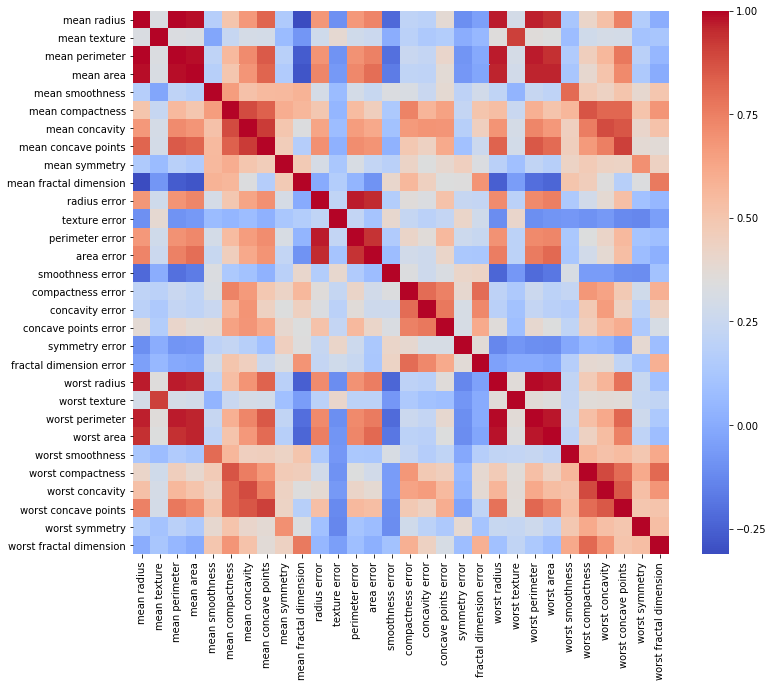

In [61]:
plt.figure(figsize = (12,10))
sns.heatmap(df_feat.corr(), cmap = "coolwarm")

The dimensionality of the feature data can be reduced via Principal Component Analysis.

In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=2)

In [64]:
pca.fit(scaled_features)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [65]:
feat_pca = pca.transform(scaled_features)

Plotting the principal components, coloured to show whether sample is benign or malignant:

Text(0,0.5,'Second Principal Component')

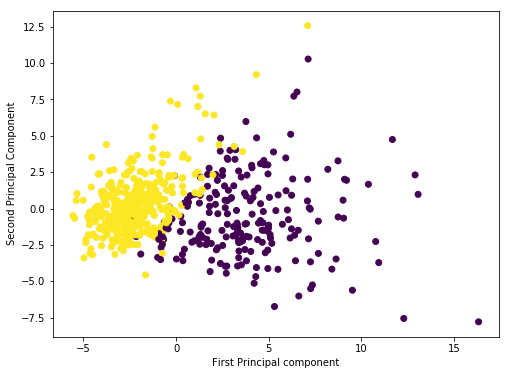

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(feat_pca[:,0],feat_pca[:,1],c=cancer['target'],cmap='viridis')
plt.xlabel('First Principal component')
plt.ylabel('Second Principal Component')


From the plot it is clear that these two prinicpal components acheive good separation of the two target classes.

Train test split on the principal component data:

In [80]:
X_train, X_test, y_train, y_test = train_test_split(feat_pca, cancer['target'], test_size = 0.3)

Training the KNN classifier:

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [81]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Evaluating the model:

In [82]:
knn_predictions = knn_model.predict(X_test)

In [83]:
print(confusion_matrix(y_test, knn_predictions))
print('\n')
print(classification_report(y_test, knn_predictions))

[[ 59  10]
 [  1 101]]


             precision    recall  f1-score   support

          0       0.98      0.86      0.91        69
          1       0.91      0.99      0.95       102

avg / total       0.94      0.94      0.93       171



Could the model be improved by choosing a different K-value?

Plotting error rate versus K for K = 1 - 40: 

In [84]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

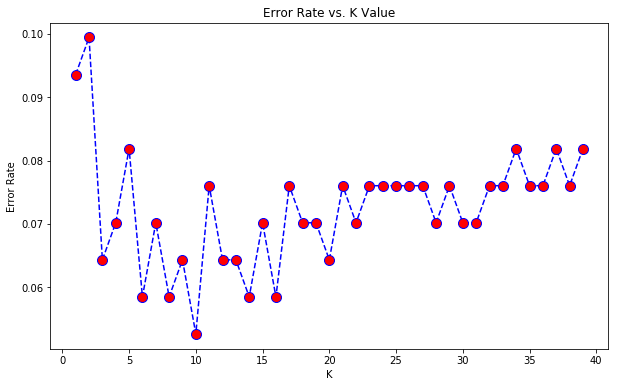

In [85]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Using the "elbow method", the plot suggests that K = 10 will give the best-performing model.

In [86]:
optimised_knn_model = KNeighborsClassifier(n_neighbors=10)
optimised_knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [87]:
optimised_knn_predictions = optimised_knn_model.predict(X_test)

In [89]:
print(confusion_matrix(y_test, optimised_knn_predictions))
print('\n')
print(classification_report(y_test, optimised_knn_predictions))

[[ 61   8]
 [  1 101]]


             precision    recall  f1-score   support

          0       0.98      0.88      0.93        69
          1       0.93      0.99      0.96       102

avg / total       0.95      0.95      0.95       171



Setting K = 10 reduced the false positive count by 2 compared to K = 3.

# Conclusion

The SVC, RFC and KNN algorithms were all able the generate models with >= 95% overall precision and recall. SVC performed best of all, with a F1-score of 0.99. Importantly for a model that could be used for cancer diagnosis, the SVC model had a zero false negative rate.